# Analisi de les submissions a kaggle, i fem una mena d'ensemble amb els models (hem utilitzat la mediana de la suma)

In [72]:
# analitzem solucions models
import pandas as pd

LReg0= pd.read_csv('Titanic_Predictions_LogReg0.csv')

GradBoost0= pd.read_csv('Titanic_Predictions_GradBoost0.csv')

LSVC= pd.read_csv('Titanic_Predictions_LSVC0.csv')

RandomForest= pd.read_csv('Titanic_Predictions_RandomForestC0.csv')

DecTree= pd.read_csv('Titanic_Predictions_DecisionTreeC0.csv')

KNeigh= pd.read_csv('Titanic_Predictions_KNeoghbours0.csv')

In [73]:
print(LReg0.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [74]:
from functools import reduce
frames = [LReg0,GradBoost0, LSVC, RandomForest, DecTree, KNeigh]

df_final = reduce(lambda left,right: pd.merge(left,right,on='PassengerId'), frames)
df_final.columns=['PassengerId','LReg0', 'GradBoost0','LSVC', 'RandomForest', 'DecTree', 'KNeigh']

In [75]:
print (df_final.head())

   PassengerId  LReg0  GradBoost0  LSVC  RandomForest  DecTree  KNeigh
0          892      0           0     0             0        0       0
1          893      1           1     1             0        0       0
2          894      0           0     0             0        0       0
3          895      0           0     0             0        0       0
4          896      1           1     1             0        0       0


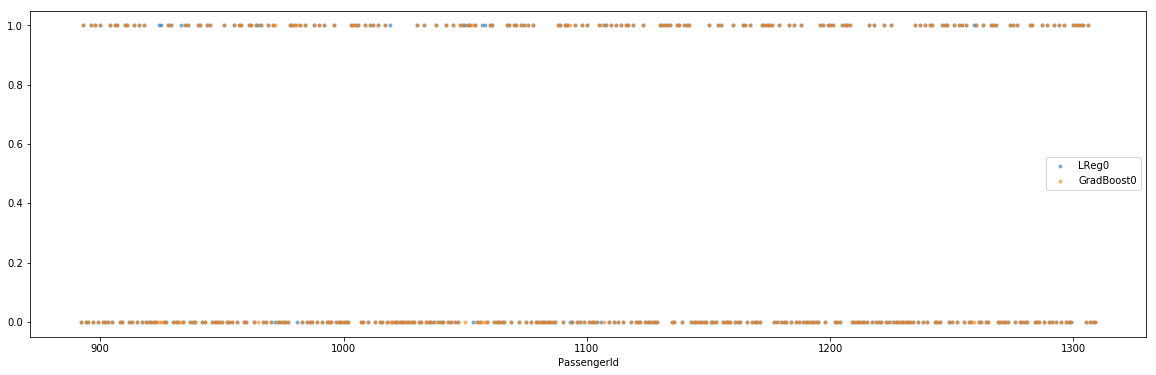

In [41]:
import matplotlib.pyplot as plt
df_final.plot(kind='line',x='PassengerId', y=['LReg0','GradBoost0'],style='.',figsize=(20,6),alpha=0.5)
plt.show()


In [76]:
df_final = df_final.set_index('PassengerId')
df_final['suma']=df_final.sum(axis=1)

In [77]:
df_final['median']=df_final.median(axis=1)

In [78]:
print(df_final)

             LReg0  GradBoost0  LSVC  RandomForest  DecTree  KNeigh  suma  \
PassengerId                                                                 
892              0           0     0             0        0       0     0   
893              1           1     1             0        0       0     3   
894              0           0     0             0        0       0     0   
895              0           0     0             0        0       0     0   
896              1           1     1             0        0       0     3   
897              0           0     0             0        0       0     0   
898              1           1     1             1        1       1     6   
899              0           0     0             0        0       0     0   
900              1           1     1             1        1       1     6   
901              0           0     0             0        0       0     0   
902              0           0     0             0        0       0     0   

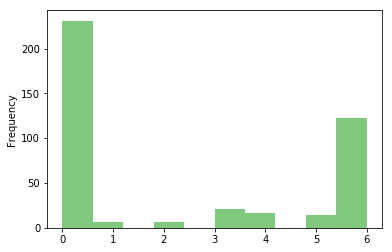

In [79]:
df_final['suma'].plot.hist(colormap='Accent')
plt.show()

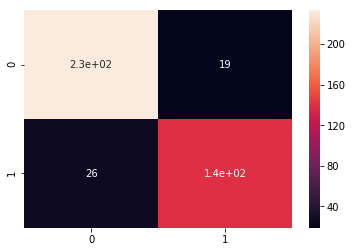

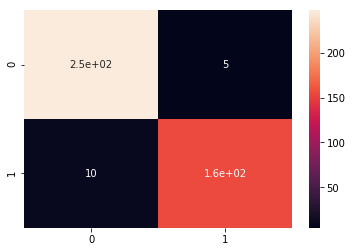

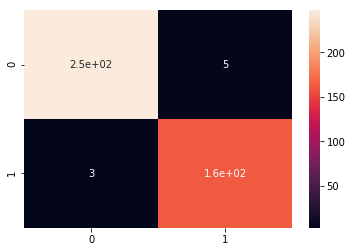

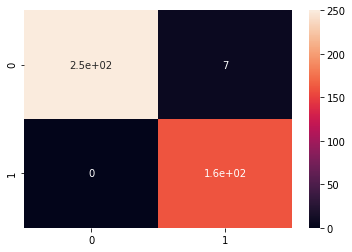

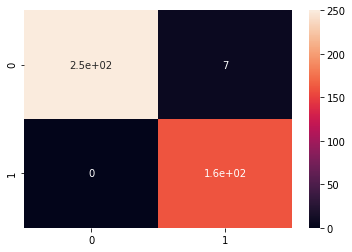

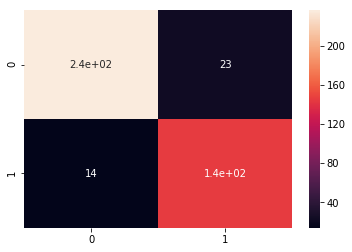

In [71]:
from sklearn.metrics import confusion_matrix
LReg0_median= confusion_matrix(df_final['LReg0'], df_final['median'])
LReg0_RandomForest= confusion_matrix(df_final['LReg0'],df_final['RandomForest'])
LReg0_GradBoost0= confusion_matrix(df_final['LReg0'],df_final['GradBoost0'])
GradBoost0_median = confusion_matrix(df_final['GradBoost0'], df_final['median'])
LSVC_median= confusion_matrix(df_final['LSVC'], df_final['median'])
RandomForest_median= confusion_matrix(df_final['RandomForest'], df_final['median'])

import seaborn as sn
sn.heatmap(LReg0_RandomForest, annot=True)
plt.show()

sn.heatmap(LReg0_GradBoost0, annot=True)
plt.show()

sn.heatmap(LReg0_median, annot=True)
plt.show()

sn.heatmap(GradBoost0_median, annot=True)
plt.show()

sn.heatmap(LSVC_median, annot=True)
plt.show()

sn.heatmap(RandomForest_median, annot=True)
plt.show()

In [89]:
submission = pd.DataFrame({'PassengerId':df_final.index.values,'Survived':df_final['median']})
submission.head()
#df.a = df.a.astype(float)
submission['Survived'] = submission['Survived'].astype(int)
print (submission.head())

             PassengerId  Survived
PassengerId                       
892                  892         0
893                  893         1
894                  894         0
895                  895         0
896                  896         1


In [90]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic_Predictions_Ensemble_Models.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Predictions_Ensemble_Models.csv
